In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
initial_data = pd.read_csv('DATA_hourly_result.csv', sep = ";")


In [20]:
initial_data.head(5)

,Timestamp,Timestamp numerical,WR I Energy positiv [Ws],WR III Energy positiv [Ws],Sum Energy positiv [Ws],Sum Energy positiv [kWh],dt_iso +0000 UTC,temp,feels_like,temp_min,...,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_id,weather_main,weather_description,Unnamed: 21
0,22.09.2020 13:00,"4,409,654,167","9,84E+05","9,93E+05","1,98E+06","0,55",22.09.2020 13:00,296.61,296.56,292.61,...,57,2.1,150,NaN,NaN,20,801,Clouds,few clouds,02d
1,22.09.2020 14:00,"4,409,658,333","1,03E+06","1,00E+06","2,03E+06","0,56",22.09.2020 14:00,296.53,296.04,292.52,...,60,3.1,140,NaN,NaN,20,801,Clouds,few clouds,02d
2,22.09.2020 15:00,"44,096,625","6,36E+05","5,53E+05","1,19E+06","0,33",22.09.2020 15:00,295.76,294.66,291.30,...,60,3.6,160,NaN,NaN,20,801,Clouds,few clouds,02d
3,22.09.2020 16:00,"4,409,666,667","4,56E+05","4,18E+05","8,74E+05","0,24",22.09.2020 16:00,293.79,292.74,289.95,...,64,3.1,150,NaN,NaN,20,801,Clouds,few clouds,02d
4,22.09.2020 17:00,"4,409,670,833","1,26E+05","1,37E+05","2,63E+05","0,07",22.09.2020 17:00,291.59,290.80,287.59,...,72,2.6,110,NaN,NaN,20,801,Clouds,few clouds,02n


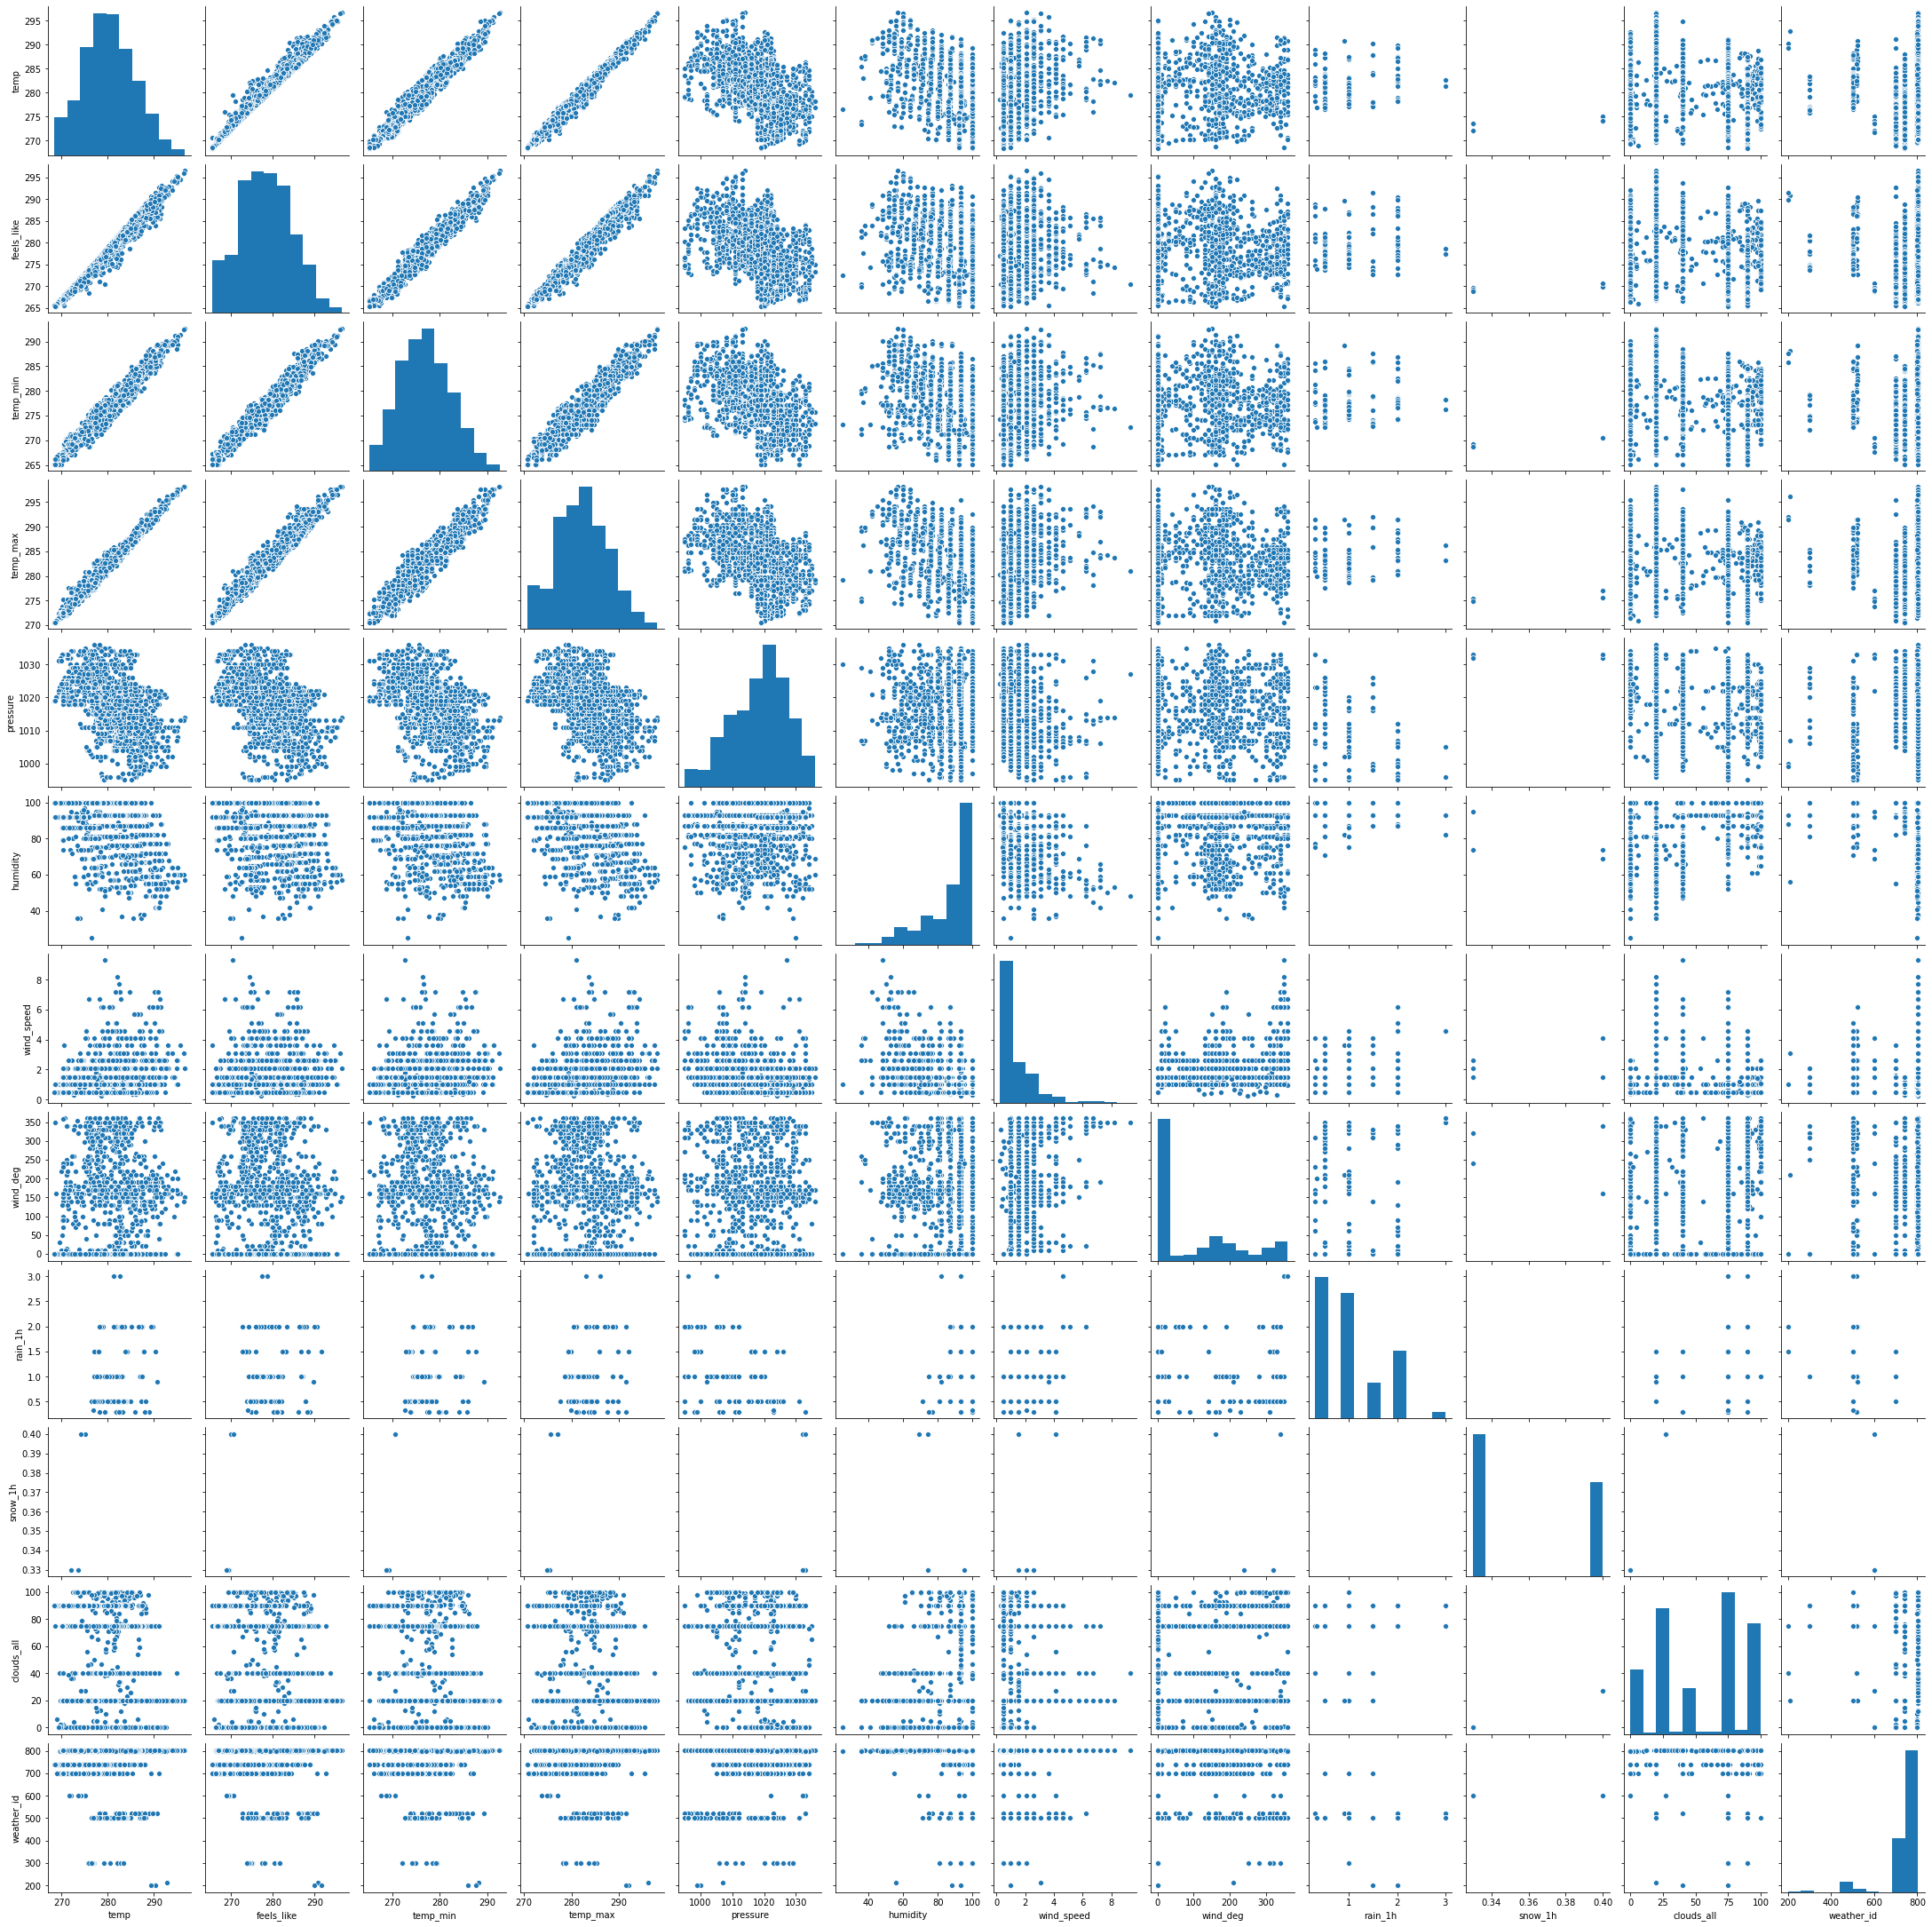

In [21]:
sns.pairplot(initial_data)